<h1 style="text-align: center;">Estimation prix Clermont-Ferrand</h1>

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import time
import math


from folium import plugins



In [2]:
df=pd.read_csv('../dev/data/RAW/val_immo.csv', 
               usecols=['Valeur fonciere', 'Voie', 'Code postal', 'Commune','Nombre pieces principales',
                        'Surface terrain','Surface Carrez']   
              )

print(df.shape)
df.head()

(326316, 7)


,Valeur fonciere,Voie,Code postal,Commune,Nombre pieces principales,Surface terrain,Surface Carrez
0,72000.0,LORETTE,1270.0,COLIGNY,2.0,381.0,35.0
1,215000.0,DU COLOMBIER,1250.0,TOSSIAT,4.0,790.0,93.0
2,235600.0,DE LA BROCHETTE,1370.0,MEILLONNAS,4.0,797.0,97.0
3,57000.0,DE STRASBOURG,1270.0,VILLEMOTIER,4.0,960.0,61.0
4,185000.0,OUSSIAT,1160.0,PONT-D AIN,4.0,924.0,107.0


In [3]:
df=df[df['Commune']=='CLERMONT FERRAND']
# J'ai mis une limitte aux surfaces
df=df[df['Surface terrain']<=1000]
df=df[df['Surface Carrez']<=200]

df=df[~df['Valeur fonciere'].isna()]

print(df.shape)

(168, 7)


In [4]:
data=df[['Valeur fonciere', 'Nombre pieces principales', 'Surface Carrez', 'Surface terrain']]

## Petite exploration 

C:\Users\33658\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\33658\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\33658\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\33658\anaconda3\lib\si

Text(0, 0.5, 'Transaction \n frequency')

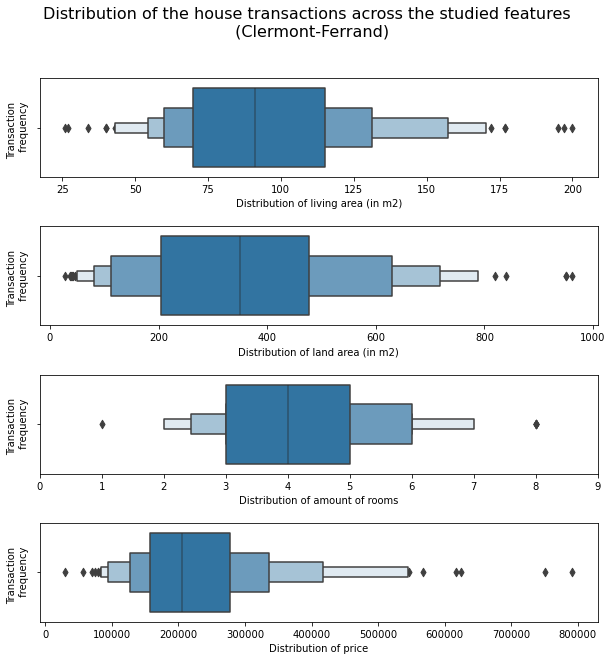

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,10) , gridspec_kw={'hspace': 0.5})

fig.suptitle('Distribution of the house transactions across the studied features \n (Clermont-Ferrand)', fontsize=16)

sns.boxenplot(df['Surface Carrez'],ax=ax1)
ax1.set_xlabel('Distribution of living area (in m2)')
ax1.set_ylabel('Transaction \n frequency')

sns.boxenplot(data['Surface terrain'],ax=ax2)
ax2.set_xlabel('Distribution of land area (in m2)')
ax2.set_ylabel('Transaction \n frequency')

sns.boxenplot(data['Nombre pieces principales'],ax=ax3)
ax3.set_xlabel('Distribution of amount of rooms')
ax3.set_ylabel('Transaction \n frequency')
ax3.set_xlim(0,9)

sns.boxenplot(data['Valeur fonciere'],ax=ax4)
ax4.set_xlabel('Distribution of price')
ax4.set_ylabel('Transaction \n frequency')


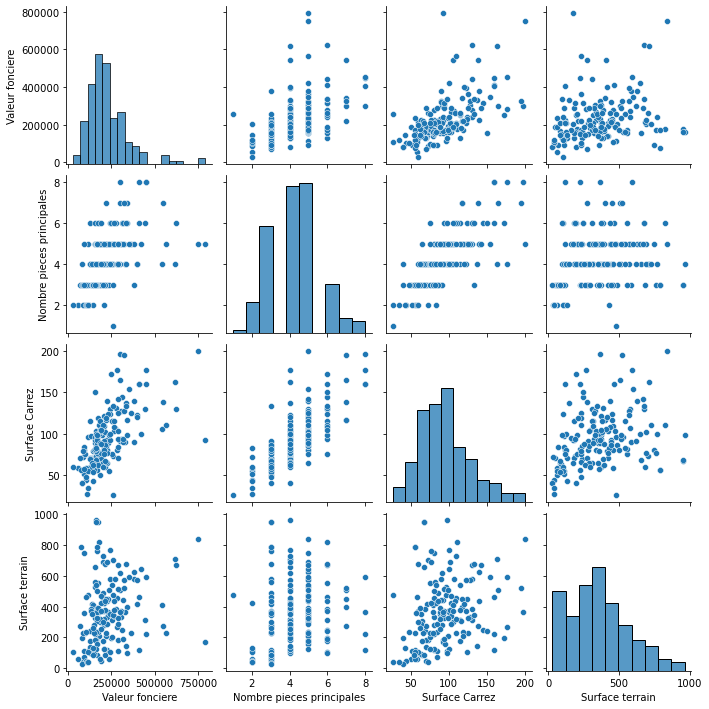

In [6]:
sns.pairplot(data=data)

# Modélisation

In [7]:
Y=data['Valeur fonciere'] 
X=data[['Nombre pieces principales','Surface Carrez', 'Surface terrain']] 

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [9]:
def plotmodel(y_test,yhat) :
    width=7
    height=5
    plt.figure(figsize=(width, height))


    ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title('Actual vs Fitted Values for house prices')
    plt.xlabel('Price')
    plt.ylabel('Proportion of houses')

    plt.show()
    plt.close()


In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.metrics import r2_score

### Simple linear regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [14]:
yhat=lm.predict(x_test)
lm_MSE=mean_squared_error(y_true=y_test, y_pred=yhat)
lm_r2=r2_score(y_true=y_test, y_pred=yhat)
print('MSE',lm_MSE, '\n', 'R2', lm_r2)

MSE 8822074288.130556 
 R2 0.47429387850067506


C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


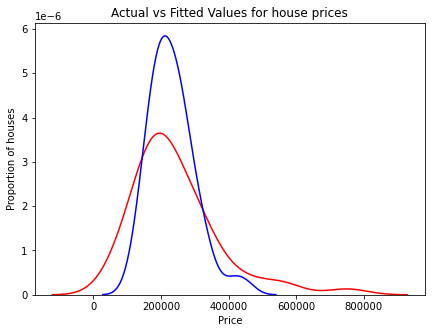

C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Valeur fonciere', ylabel='Density'>

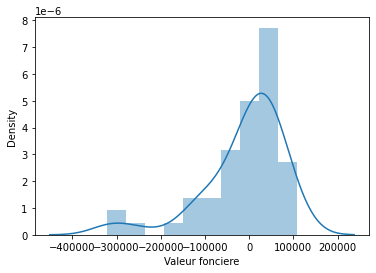

In [15]:
plotmodel(y_test, yhat)
sns.distplot(yhat-y_test)

###  Polynomial regression avec une data standardisation

In [16]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=1 ,include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [18]:
yhat=pipe.predict(x_test)
poly_MSE=mean_squared_error(y_true=y_test, y_pred=yhat)
poly_r2=r2_score(y_true=y_test, y_pred=yhat)
print('MSE',poly_MSE, '\n', 'R2', poly_r2)

MSE 8822074288.130558 
 R2 0.47429387850067484


C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


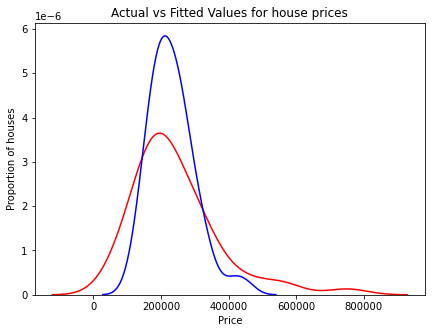

C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Valeur fonciere', ylabel='Density'>

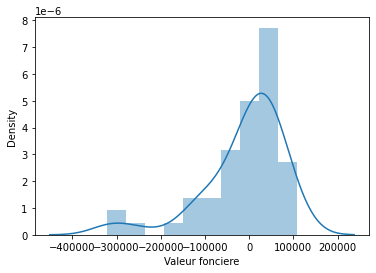

In [19]:
plotmodel(y_test, yhat)
sns.distplot(yhat-y_test)

In [20]:
degrees=range(1,7)
listpoly_MSE=[]
listpoly_R2=[]
for degree in degrees :
    Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=degree ,include_bias=False)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x_train,y_train)
    yhat=pipe.predict(x_test)
    listpoly_MSE.append(mean_squared_error(y_true=y_test, y_pred=yhat))
    listpoly_R2.append(r2_score(y_true=y_test, y_pred=yhat))

print('Max R2' , max(listpoly_R2),
    ' reached with an order of' , degrees[listpoly_R2.index(max(listpoly_R2))],
    '\n',
    'Min MSE' ,min(listpoly_MSE),
    ' reached with an order of', degrees[listpoly_MSE.index(min(listpoly_MSE))]
    )

Max R2 0.6092100192927578  reached with an order of 2 
 Min MSE 6557995237.003959  reached with an order of 2


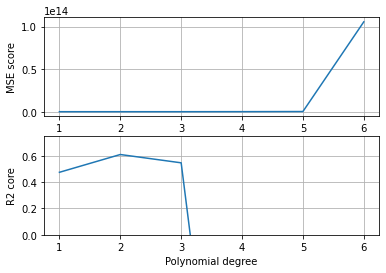

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(degrees, listpoly_MSE)
ax2.plot(degrees, listpoly_R2)
ax1.set_xlabel('Polynomial degree')
ax1.set_ylabel('MSE score')
ax2.set_xlabel('Polynomial degree')
ax2.set_ylabel('R2 core')
ax2.set_ylim(0,0.75)
ax1.grid(True)
ax2.grid(True)
plt.show()

### Ridge regression en utilisant GridSearchCV

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
RR=Ridge()
Grid = GridSearchCV(RR, parameters,cv=5)
Grid.fit(X,Y)
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=10000)

In [24]:
yhat=BestRR.predict(x_test)
RR_MSE=mean_squared_error(y_true=y_test, y_pred=yhat)
RR_r2=r2_score(y_true=y_test, y_pred=yhat)
print('MSE',RR_MSE, '\n', 'R2', RR_r2)

MSE 8272231172.545962 
 R2 0.5070589496490766


C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


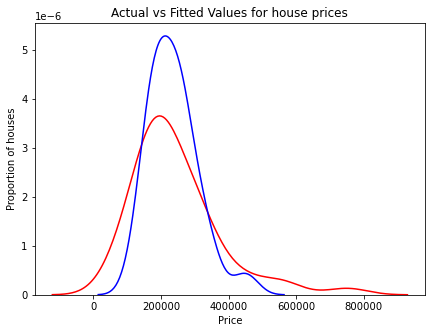

C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Valeur fonciere', ylabel='Density'>

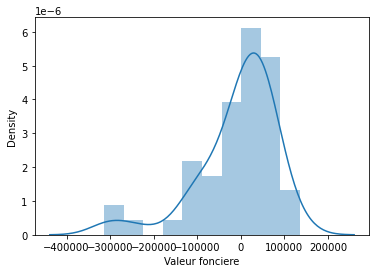

In [25]:
plotmodel(y_test, yhat)
sns.distplot(yhat-y_test)

###  Test avec R2

In [26]:
score_report={"Linear regression":[lm_r2,lm_MSE],
             "Polynomial regression":[poly_r2,poly_MSE],
             "Ridge regression":[RR_r2,RR_MSE]}
score_report=pd.DataFrame.from_dict(score_report, orient='index', columns=['R2 score','MSE score'])
score_report

,R2 score,MSE score
Linear regression,0.474294,8.822074e+09
Polynomial regression,0.474294,8.822074e+09
Ridge regression,0.507059,8.272231e+09


### Utiliser le modèle pour une estimation du prix

In [27]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:
lm = LinearRegression()
lm.fit(X,Y)

def estimate(Nb_pieces,Surface_Carrez, Surface_terrain) :
    x={'Nombre pieces principales':[Nb_pieces],
          'Surface Carrez':[Surface_Carrez], 
          'Surface terrain' :[Surface_terrain]}
    x=pd.DataFrame.from_dict(x, orient='columns')
    return print('Prix estimé :',lm.predict(x)[0])

In [29]:
Nb_pieces=widgets.FloatSlider(value=4,min=3, max=5, step=1, description='NB pieces')
Surface_Carrez=widgets.FloatSlider(value=100,min=50, max=150, step=10, description='S Carrez')
Surface_terrain=widgets.FloatSlider(value=200,min=60, max=600, step=25, description='S terrain')

interact(estimate, Nb_pieces=Nb_pieces,Surface_Carrez=Surface_Carrez, Surface_terrain=Surface_terrain)


interactive(children=(FloatSlider(value=4.0, description='NB pieces', max=5.0, min=3.0, step=1.0), FloatSlider…

<function __main__.estimate(Nb_pieces, Surface_Carrez, Surface_terrain)>